In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_train[0].shape

(32, 32, 3)

In [28]:
x_train[0].max()

255

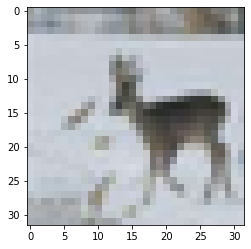

In [25]:
plt.imshow(x_train[20])

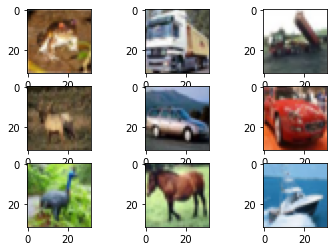

In [19]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [29]:
x_train = x_train/255

In [30]:
x_test = x_test/255

In [31]:
x_test.shape

(10000, 32, 32, 3)

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
y_cat_train = to_categorical(y_train,10)

In [34]:
y_cat_test = to_categorical(y_test,10)

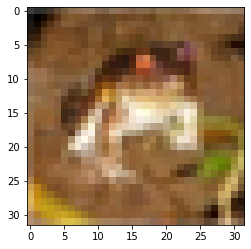

In [35]:
plt.imshow(x_train[0])

In [36]:
y_train[0]

array([6], dtype=uint8)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [45]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [49]:
model.fit(x_train,y_cat_train,epochs=12,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/12
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7145 - accuracy: 0.3754 - val_loss: 1.2861 - val_accuracy: 0.5418
Epoch 2/12
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2116 - accuracy: 0.5729 - val_loss: 1.1147 - val_accuracy: 0.6055
Epoch 3/12
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0424 - accuracy: 0.6337 - val_loss: 1.0450 - val_accuracy: 0.6377
Epoch 4/12
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9162 - accuracy: 0.6795 - val_loss: 0.9863 - val_accuracy: 0.6543
Epoch 5/12
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8222 - accuracy: 0.7147 - val_loss: 1.0109 - val_accuracy: 0.6602
Epoch 6/12
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7434 - accuracy: 0.7419 - val_loss: 0.9464 - val_accuracy: 0.6804
Epoch 7/12
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6680 - accuracy: 0.7681 - val_loss: 0.9572 - val_ac

In [50]:
x_train.shape

(50000, 32, 32, 3)

In [53]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.507511,0.45676,1.286060,0.5418
1,1.176629,0.58588,1.114663,0.6055
2,1.029408,0.64024,1.045035,0.6377
3,0.918250,0.67998,0.986260,0.6543
4,0.827818,0.71308,1.010914,0.6602
5,0.752269,0.73814,0.946398,0.6804
6,0.686702,0.75952,0.957155,0.6804
7,0.621553,0.78260,1.037753,0.6677


In [54]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

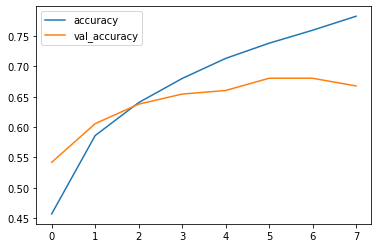

In [55]:
metrics[['accuracy','val_accuracy']].plot()

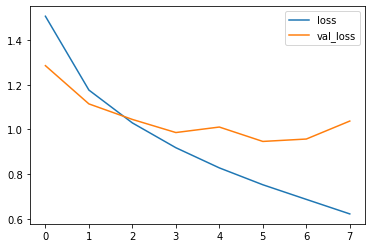

In [56]:
metrics[['loss','val_loss']].plot()

In [57]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0377534627914429, 0.6676999926567078]

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
predictions = np.argmax(model.predict(x_test),axis=1)

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1000
           1       0.80      0.78      0.79      1000
           2       0.67      0.42      0.52      1000
           3       0.49      0.47      0.48      1000
           4       0.55      0.72      0.62      1000
           5       0.53      0.64      0.58      1000
           6       0.72      0.79      0.75      1000
           7       0.73      0.71      0.72      1000
           8       0.78      0.74      0.76      1000
           9       0.84      0.65      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [66]:
confusion_matrix(y_test,predictions)

array([[773,  22,  30,  30,  35,   8,  15,  15,  55,  17],
       [ 43, 779,   6,  17,  14,  10,  18,   9,  52,  52],
       [ 82,   8, 422,  78, 157, 115,  80,  40,  14,   4],
       [ 24,   8,  39, 472, 102, 208,  77,  42,  16,  12],
       [ 23,   3,  34,  48, 717,  48,  53,  60,  13,   1],
       [ 15,   8,  23, 166,  67, 637,  25,  55,   2,   2],
       [  7,   5,  26,  55,  55,  42, 787,  12,   5,   6],
       [ 17,   3,  18,  35, 112,  87,  10, 706,   2,  10],
       [126,  36,  17,  22,  18,  17,   6,   5, 738,  15],
       [ 58, 107,  15,  32,  23,  21,  23,  26,  49, 646]])

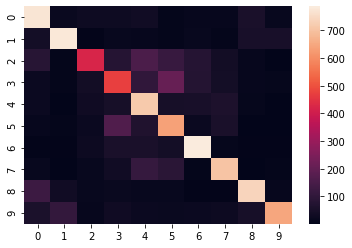

In [68]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions))

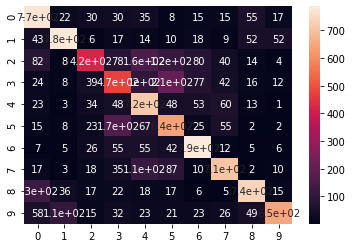

In [69]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [70]:
custom_test = x_test[0]

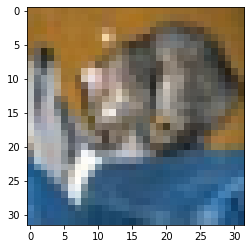

In [71]:
plt.imshow(custom_test)

In [72]:
y_test[0]

array([3], dtype=uint8)

In [75]:
np.argmax(model.predict(custom_test.reshape(1,32,32,3)))

3

In [77]:
model.save('keras_cifar10_data.h5')